## Import

In [3]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

## Be sure to used Tensorflow 2.0

In [4]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [14]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.mean())
print(images.std())

print(images.shape)
print(targets.shape)

-1.0476880134421886e-18
1.0000000000000007
(10000, 784)
(10000,)


## Plot one of the data

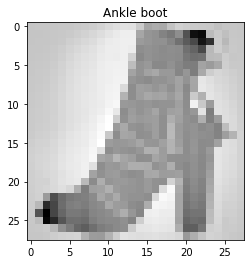

In [6]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
plt.imshow(np.reshape(images[11], (28, 28)), cmap="binary")
plt.title(targets_names[targets[11]])
plt.show()

# Create the model
![](images/simple_nn.png)

# Create the model

In [7]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.57453305 0.00949466 0.0221495  0.05787427 0.04048685 0.04864416
  0.16908267 0.02852796 0.02234269 0.02686421]] [9]


## Model Summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [9]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [10]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 0.8755 - accuracy: 0.7074 - val_loss: 0.6344 - val_accuracy: 0.7820
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8105 - val_loss: 0.5418 - val_accuracy: 0.8160
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4519 - accuracy: 0.8399 - val_loss: 0.4872 - val_accuracy: 0.8295
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8608 - val_loss: 0.4592 - val_accuracy: 0.8365
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8709 - val_loss: 0.4486 - val_accuracy: 0.8370
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8859 - val_loss: 0.4352 - val_accuracy: 0.8500
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3192 - accuracy: 0.8917 - val_loss: 0.4307 - val_accuracy: 0.8440
Epoch 

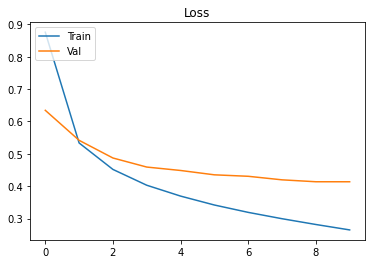

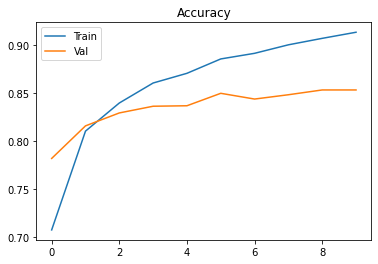

In [11]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [12]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.4518 - accuracy: 0.8411
Test Loss 0.45178213715553284
Test Accuracy 0.8410999774932861
